# Road Accident prediction model using simple linear regression

## Import required libraries

In [45]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

## numpy is for numerical computation.
## pandas is for data manupulation and analysis
## matplotlib is for data visulization
## sklearn for machine learning

#### Load the dataset

In [3]:
dataset_url= "https://raw.githubusercontent.com/goradbj/MachineLearning/main/Regression/Road-Accidents-2018-Annexure-1.csv"
df = pd.read_csv(dataset_url)

In [4]:
df

,Years,Total Number of Road Accidents (in numbers),Total Number of Persons Killed (in numbers),Total Number of Persons Injured (in numbers),Population of India (in thousands),Total Number of Registered Motor Vehicles (in thousands),Road Length (in kms),Number of Accidents per Lakh Population,Number of Accidents per Ten Thousand Vehicles,Number of Accidents Per Ten Thousand Kms of Roads,Number of Persons Killed Per Lakh Population,Number of Persons Killed Per Ten Thousand Vehicles,Number of Persons Killed per Ten Thousand Kms of Roads,Number of Persons Injured per Lakh Population,Number of Persons Injured Per Ten Thousand Vehicles,Number of Persons Injured Per Ten Thousand Kms of Roads
0,1970,114100.00,14500.00,70100.00,539000.00,1401.0,1188728.0,21.2,814.4,959.8,2.7,103.5,122.0,13.0,500.4,589.7
1,1980,153200.00,24000.00,109100.00,673000.00,4521.0,1491873.0,22.8,338.9,1026.9,3.6,53.1,160.9,16.2,241.3,731.3
2,1990,282600.00,54100.00,244100.00,835000.00,19152.0,1983867.0,33.8,147.6,1424.5,6.5,28.2,272.7,29.2,127.5,1230.4
3,1994,325864.00,64463.00,311500.00,904000.00,27660.0,2890950.0,36.0,117.8,1127.2,7.1,23.3,223.0,34.5,112.6,1077.5
4,1995,351999.00,70781.00,323200.00,924359.00,30295.0,2975035.0,38.1,116.2,1183.2,7.7,23.4,237.9,35.0,106.7,1086.4
5,1996,371204.00,74665.00,369502.00,941579.00,33786.0,3202515.0,39.4,109.9,1159.1,7.9,22.1,233.1,39.2,109.4,1153.8
6,1997,373671.00,76977.00,378361.00,959792.00,37332.0,3298788.0,38.9,100.1,1132.8,8.0,20.6,233.3,39.4,101.4,1147.0
7,1998,385018.00,79919.00,390674.00,978081.00,41368.0,3228356.0,39.4,93.1,1192.6,8.2,19.3,247.6,39.9,94.4,1210.1
8,1999,386456.00,81966.00,375051.00,996130.00,44875.0,3296650.0,38.8,86.1,1172.3,8.2,18.3,248.6,37.7,83.6,1137.7
9,2000,391449.00,78911.00,399265.00,1014825.00,48857.0,3316078.0,38.6,80.1,1180.5,7.8,16.2,238.0,39.3,81.7,1204.0


#### Exploratory Data Analysis and data Preprocessing

In [5]:
df.head()

,Years,Total Number of Road Accidents (in numbers),Total Number of Persons Killed (in numbers),Total Number of Persons Injured (in numbers),Population of India (in thousands),Total Number of Registered Motor Vehicles (in thousands),Road Length (in kms),Number of Accidents per Lakh Population,Number of Accidents per Ten Thousand Vehicles,Number of Accidents Per Ten Thousand Kms of Roads,Number of Persons Killed Per Lakh Population,Number of Persons Killed Per Ten Thousand Vehicles,Number of Persons Killed per Ten Thousand Kms of Roads,Number of Persons Injured per Lakh Population,Number of Persons Injured Per Ten Thousand Vehicles,Number of Persons Injured Per Ten Thousand Kms of Roads
0,1970,114100.0,14500.0,70100.0,539000.0,1401.0,1188728.0,21.2,814.4,959.8,2.7,103.5,122.0,13.0,500.4,589.7
1,1980,153200.0,24000.0,109100.0,673000.0,4521.0,1491873.0,22.8,338.9,1026.9,3.6,53.1,160.9,16.2,241.3,731.3
2,1990,282600.0,54100.0,244100.0,835000.0,19152.0,1983867.0,33.8,147.6,1424.5,6.5,28.2,272.7,29.2,127.5,1230.4
3,1994,325864.0,64463.0,311500.0,904000.0,27660.0,2890950.0,36.0,117.8,1127.2,7.1,23.3,223.0,34.5,112.6,1077.5
4,1995,351999.0,70781.0,323200.0,924359.0,30295.0,2975035.0,38.1,116.2,1183.2,7.7,23.4,237.9,35.0,106.7,1086.4


In [6]:
df.columns

Index(['Years', 'Total Number of Road Accidents (in numbers)',
       'Total Number of Persons Killed (in numbers)',
       'Total Number of Persons Injured (in numbers)',
       'Population of India (in thousands)',
       'Total Number of Registered Motor Vehicles (in thousands)',
       'Road Length (in kms)', 'Number of Accidents per Lakh Population',
       'Number of Accidents per Ten Thousand Vehicles',
       'Number of Accidents Per Ten Thousand Kms of Roads',
       'Number of Persons Killed Per Lakh Population',
       'Number of Persons Killed Per Ten Thousand Vehicles',
       'Number of Persons Killed per Ten Thousand Kms of Roads',
       'Number of Persons Injured per Lakh Population',
       'Number of Persons Injured Per Ten Thousand Vehicles',
       'Number of Persons Injured Per Ten Thousand Kms of Roads'],
      dtype='object')

In [7]:
df.shape

(29, 16)

#### Select only relavent columns/Features (simple linear regression)

In [8]:
mdf=df[['Years','Total Number of Persons Killed (in numbers)']]

In [9]:
mdf

,Years,Total Number of Persons Killed (in numbers)
0,1970,14500.00
1,1980,24000.00
2,1990,54100.00
3,1994,64463.00
4,1995,70781.00
5,1996,74665.00
6,1997,76977.00
7,1998,79919.00
8,1999,81966.00
9,2000,78911.00


#### Lets drop the row no 28 as it is not in proper formate

In [11]:
mdf = mdf.drop(mdf.index[28])

In [13]:
mdf.tail()

,Years,Total Number of Persons Killed (in numbers)
23,2014,139671.0
24,2015,146133.0
25,2016,150785.0
26,2017,147913.0
27,2018,151417.0


#### Check for missing values

In [14]:
mdf.isnull().sum()

Years                                          0
Total Number of Persons Killed (in numbers)    0
dtype: int64

#### If there is any categorical variable ,encode it-> Not applicable in this current case (categorical means datatype is text)

#### If you have more input features try to scale into same level -> currently not applicable

#### Data Visualization

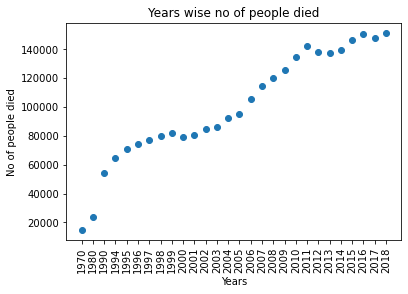

In [17]:
plt.scatter(mdf['Years'],mdf['Total Number of Persons Killed (in numbers)'])
plt.xticks(rotation='vertical')
plt.xlabel("Years")
plt.ylabel("No of people died")
plt.title("Years wise no of people died")
plt.show()

#### By observing this graph we can say that ,year and no of people died is having positive linear relationship

y=mx+c

No of people died = m * Years + C

#### Divide the data into input and output then training and testing data

In [18]:
mdf.head()

,Years,Total Number of Persons Killed (in numbers)
0,1970,14500.0
1,1980,24000.0
2,1990,54100.0
3,1994,64463.0
4,1995,70781.0


In [19]:
## iloc function is use to divide data
X = mdf.iloc[:,:-1].values        ## row = all, columns = all columns till -1(last column not include)
Y = mdf.iloc[:,-1].values        ## row = all, column = only -1(last)

In [21]:
X

array([['1970'],
       ['1980'],
       ['1990'],
       ['1994'],
       ['1995'],
       ['1996'],
       ['1997'],
       ['1998'],
       ['1999'],
       ['2000'],
       ['2001'],
       ['2002'],
       ['2003'],
       ['2004'],
       ['2005'],
       ['2006'],
       ['2007'],
       ['2008'],
       ['2009'],
       ['2010'],
       ['2011'],
       ['2012'],
       ['2013'],
       ['2014'],
       ['2015'],
       ['2016'],
       ['2017'],
       ['2018']], dtype=object)

In [22]:
Y

array([ 14500.,  24000.,  54100.,  64463.,  70781.,  74665.,  76977.,
        79919.,  81966.,  78911.,  80888.,  84674.,  85998.,  92618.,
        94968., 105749., 114444., 119860., 125660., 134513., 142485.,
       138258., 137572., 139671., 146133., 150785., 147913., 151417.])

In [24]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [26]:
print(mdf.shape)
print(X.shape)
print(Y.shape)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(28, 2)
(28, 1)
(28,)
(19, 1)
(9, 1)
(19,)
(9,)


### Build Linear regression model

In [28]:
model= linear_model.LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [30]:
# coef means value of M
model.coef_

array([3226.90044807])

In [31]:
# value of C
model.intercept_

-6363360.076171876

In [32]:
# check performance of model manually
# Y=mx+c
3226.90044807*2018-6363360.076171876

148525.02803338412

#### do the prediction

In [34]:
model.predict([[2018]])

array([148525.02803309])

In [37]:
model.predict([[2050]])

array([251785.84237132])

In [38]:
# 689 people died every day in 2050
251785/365

689.8219178082192

In [39]:
X_test

array([['1990'],
       ['2013'],
       ['2005'],
       ['2008'],
       ['1996'],
       ['2002'],
       ['2015'],
       ['2004'],
       ['2011']], dtype=object)

In [40]:
Y_test

array([ 54100., 137572.,  94968., 119860.,  74665.,  84674., 146133.,
        92618., 142485.])

In [42]:
y_pred=model.predict(X_test)

In [43]:
y_pred

array([ 58171.81548713, 132390.52579274, 106575.32220818, 116256.02355239,
        77533.21817555,  96894.62086397, 138844.32668888, 103348.42176011,
       125936.7248966 ])

#### Performance Analysis of Model

In [49]:
# calculate mean absolute and squred error and r2 score and root mean squre error

mae = mean_absolute_error(y_pred,Y_test)
mse = mean_squared_error(y_pred,Y_test)
r2 = r2_score(y_pred,Y_test)
rmse = np.sqrt(mse)

print("MAE = ",mae)
print("MSE = ",mse)
print("RMSE = ",rmse)
print("R2 SCORE = ",r2)       # Over model is around 85% accurate

MAE =  8235.644173815432
MSE =  87869811.09873721
RMSE =  9373.889859537352
R2 SCORE =  0.8553082770946241


#### Draw the prediction line

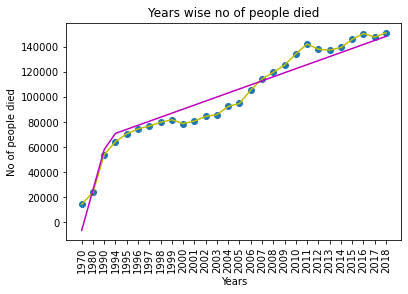

In [52]:
plt.scatter(mdf['Years'],mdf['Total Number of Persons Killed (in numbers)'])
plt.plot(mdf['Years'],mdf['Total Number of Persons Killed (in numbers)'],c='y')  #acual line
plt.plot(mdf['Years'],model.predict(mdf[['Years']]),c='m')  #predicted line
plt.xticks(rotation='vertical')
plt.xlabel("Years")
plt.ylabel("No of people died")
plt.title("Years wise no of people died")
plt.show()